In [603]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.columns.values)

'''
Categorical = Survived, Sex, Embarked, pclass (Ticked class)  (finite many categories and can't be ordered or doesnt matter)
Numerical:
    Continous: Fare
    Discrete: Age, SibSp, Parch
Not sure/text: Ticket, Cabin

'''
    
print(train.info())

#Two floats (fare and age), 5 ints and 5 objects (Ticket and Cabin etc)
#Age, Cabin and Embarked contains missing data

print(train.describe())
#only around  38% survived, Age is around 30+--15,
# more than 75% passengers did not travel with parents or child.
# fares vary a lot!!

temp = train[["Sex", "Embarked", "Cabin"]]
print(temp.describe())
temp["Embarked"].unique() #S C and Q
#3/4 of cabins are unique
#65% are male


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0

array(['S', 'C', 'Q', nan], dtype=object)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908
************
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


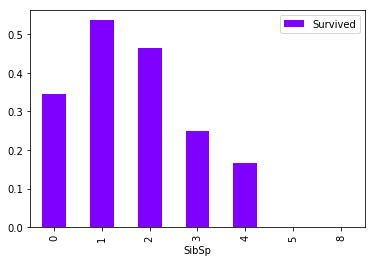

In [604]:
## We want to complete Age and Embark
## We may drop Cabin as it is highly incomplete and PassenderId, Name and Ticket
## Can create Family from SibSp and parch or isAlone feature

#train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

temp1 = train[['Pclass', 'Survived']].groupby(['Pclass']).mean() #takes mean of groups 1,2 and 3
temp2 = train[['Sex', 'Survived']].groupby(['Sex']).mean()

print(temp1)
print(temp2)

#63% of passengers in class 1 survived and 74% of females survived.
print("************")
temp3 = train[['Parch', 'Survived']].groupby(['Parch']).mean()
temp4 = train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
print(temp3)
print(temp4)
# No clear relationship so create isAlone

temp4.plot(kind = "bar", colormap="rainbow")




In [605]:
temp = (train["Parch"] > 0) | (train["SibSp"] > 0)

train["isAlone"] = temp*1
train.columns.values
temp = train[["isAlone", "Survived"]].groupby(["isAlone"]).mean()
print(temp)
#so if alone then only 30% to survive and if not alone then 50% to survive.

         Survived
isAlone          
0        0.303538
1        0.505650


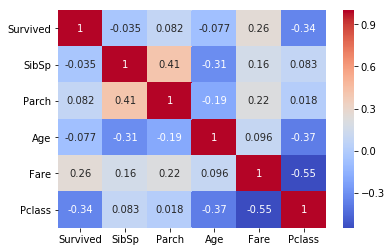

In [606]:

sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare", "Pclass"]].corr(), annot=True, cmap = "coolwarm")
#Fare has highest corr with survived but e.g age can still affect.
# Maybe there are groups with higher prob of surv for ex <=4 always survive since babies while maybe
# 20-40 play heros and die while 70+ survive


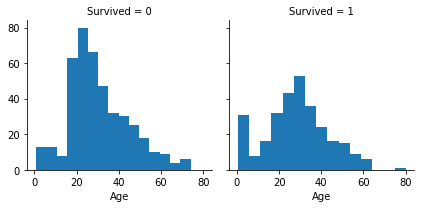

In [607]:

g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist, "Age", bins=15)
# infant survive and 15-25 did not survive. Around 80 also survived


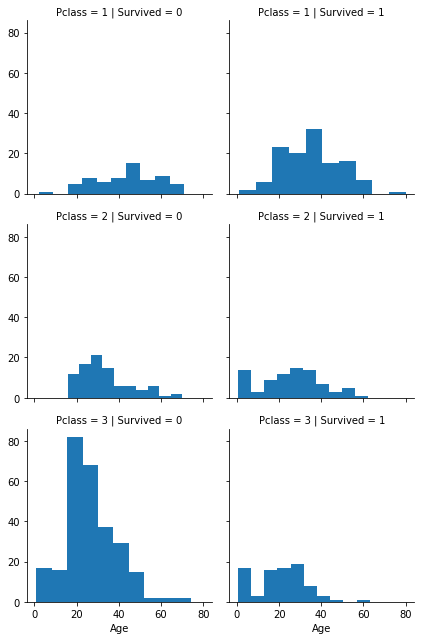

In [608]:
g = sns.FacetGrid(train, row="Pclass", col = "Survived")
g.map(plt.hist, "Age")
#People in class 3 did not survive

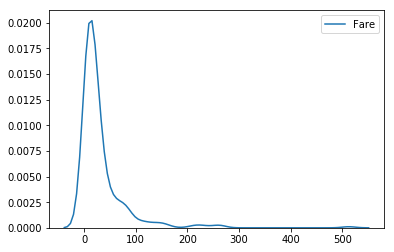

In [609]:
sns.kdeplot(train["Fare"])
#slightly skewed. Maybe log-transform to change this?

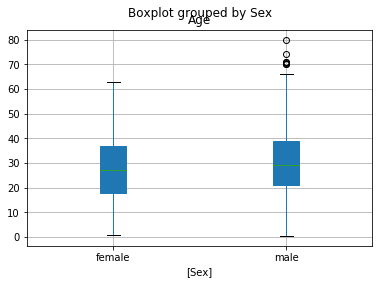

In [610]:

train[["Age", "Sex"]].boxplot(by = "Sex", patch_artist = True)

In [611]:
train.drop(["Ticket", "Cabin", "PassengerId"], inplace=True, axis=1)

In [612]:
train.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'isAlone'], dtype=object)

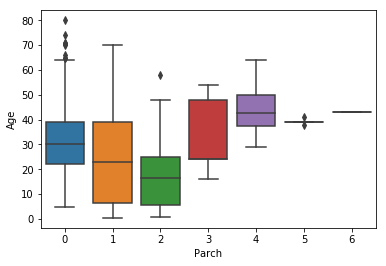

In [613]:
sns.boxplot(x = "Parch", y = "Age", data=train)


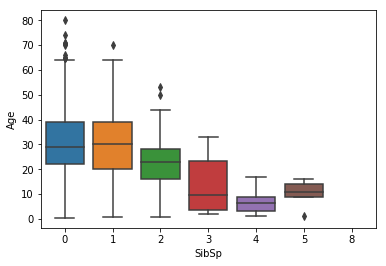

In [614]:
sns.boxplot(x = "SibSp", y = "Age", data=train)
#so if have many siblings then age is around 10


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Capt          1
Mme           1
Jonkheer      1
Lady          1
Don           1
Ms            1
Countess      1
Name: Title, dtype: int64


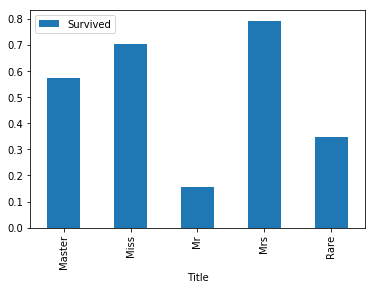

In [615]:
train["Title"] = train["Name"].str.extract("([A-Za-z]+)\.")
print(train["Title"].value_counts())
#remove everything below master (exluding)
train["Title"].replace(["Dr", "Rev", "Major", "Col", "Sir", "Capt",  "Jonkheer", "Lady", "Don"
                       , "Countess"], "Rare", inplace=True)

train["Title"].replace("Mlle", "Miss", inplace=True)
train["Title"].replace("Mme", "Mrs", inplace=True)
train["Title"].replace("Ms", "Miss", inplace=True)
train[["Survived","Title"]].groupby("Title").mean().plot(kind = "bar")
train.drop("Name", axis = 1, inplace=True)
# so if Mr then very low chance to survive


In [588]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
train["Title"] = train["Title"].map({"Mr": 0, "Master": 1, "Miss": 2, "Mrs":3})
print(train)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  isAlone  \
0           0       3    0  22.0      1      0    7.2500        S        1   
1           1       1    1  38.0      1      0   71.2833        C        1   
2           1       3    1  26.0      0      0    7.9250        S        0   
3           1       1    1  35.0      1      0   53.1000        S        1   
4           0       3    0  35.0      0      0    8.0500        S        0   
5           0       3    0   NaN      0      0    8.4583        Q        0   
6           0       1    0  54.0      0      0   51.8625        S        0   
7           0       3    0   2.0      3      1   21.0750        S        1   
8           1       3    1  27.0      0      2   11.1333        S        1   
9           1       2    1  14.0      1      0   30.0708        C        1   
10          1       3    1   4.0      1      1   16.7000        S        1   
11          1       1    1  58.0      0      0   26.5500        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
isAlone     891 non-null int64
Title       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


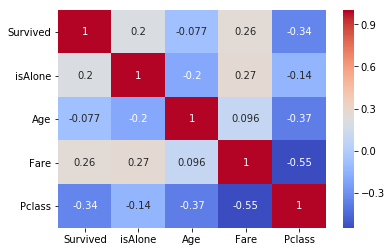

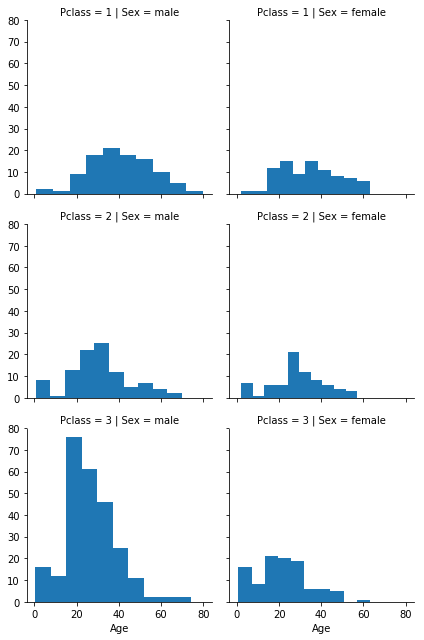

In [616]:
train.info()
#Need to fill in values for Name, Age and Embarked
sns.heatmap(train[["Survived", "isAlone", "Age", "Fare", "Pclass"]].corr(), annot=True, cmap = "coolwarm")
g = sns.FacetGrid(col = "Sex", row = "Pclass", data=train)
g.map(plt.hist, "Age")
#isAlone and Pclass most correlated with Age. Fill it in with median of 4 groups
#Note want to keep as many data points as possible

In [590]:
guess_age = np.zeros((2,3))
for i in range(2):
    for j in range(3):
        guess_age[i,j] = int(train.loc[(train["Age"].notnull()) & (train["Sex"] == i) & (train["Pclass"] == j+1), "Age"].median())
        train.loc[(train["Age"].isnull()) & (train["Sex"] == i) & (train["Pclass"] == j+1), "Age"] = guess_age[i,j]


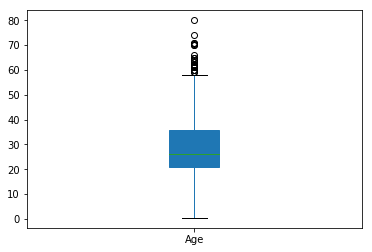

In [591]:
#Numeric variables we have are: Parch, SibSp, Age and Fare. 
#Use Tukey Method to remove these
from collections import Counter
train["Age"].plot(kind = "box", patch_artist=True)

outlier_indices = []
for feature in ["Parch", "SibSp", "Age", "Fare"]:
    Q1 = np.quantile(train[feature], 0.25)
    Q3 = np.quantile(train[feature], 0.75)
    
    IQR = Q3-Q1 
    outlier_indices += train.loc[(train[feature] < Q1-1.5*IQR) | (train[feature] > Q3+1.5*IQR), feature].index.tolist()
    
counter = Counter(outlier_indices)
outlier_indices = [k for k,v in counter.items() if v >= 3] #find 13 outliers. Remove them!
train.drop(outlier_indices, axis = 0, inplace=True)


In [592]:
train.drop(["Parch","SibSp"], axis=1, inplace=True) #inplace means change this dataframe

In [593]:
#only 2 missing values for embarked so take most frequent one
mode = train["Embarked"].dropna().mode()[0]
mean_fare = train["Fare"].mean()
train.loc[train["Embarked"].isnull(), "Embarked"] = mode
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2})


In [594]:
train.info()
#For title: if Male take Mr and if Female take Miss

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 890
Data columns (total 8 columns):
Survived    878 non-null int64
Pclass      878 non-null int64
Sex         878 non-null int64
Age         878 non-null float64
Fare        878 non-null float64
Embarked    878 non-null int64
isAlone     878 non-null int64
Title       856 non-null float64
dtypes: float64(3), int64(5)
memory usage: 61.7 KB


In [595]:
train.loc[train["Title"].isnull() & train["Sex"] == 0, "Title"] = 0
train.loc[train["Title"].isnull() & train["Sex"] == 1, "Title"] = 2



In [596]:
# NOW NEED TO FIX DATA IN TEST SET ALSO!!
# Note can't use this test set to check further for correlation between
# features because that would be cheating. When want to fill in 
#missing data that should be done using train set
X_test = test.copy()
temp = (X_test["Parch"] > 0) | (X_test["SibSp"] > 0)
X_test["isAlone"] = temp*1

X_test["Title"] = X_test["Name"].str.extract("([A-Za-z]+)\.")
X_test["Title"].replace(["Dr", "Rev", "Major", "Col", "Sir", "Capt",  "Jonkheer", "Lady", "Don"
                       , "Countess"], "Rare", inplace=True)

X_test["Title"].replace("Mlle", "Miss", inplace=True)
X_test["Title"].replace("Mme", "Mrs", inplace=True)
X_test["Title"].replace("Ms", "Miss", inplace=True)
X_test["Sex"] = X_test["Sex"].map({"male": 0, "female": 1})
X_test["Title"] = X_test["Title"].map({"Mr": 0, "Master": 1, "Miss": 2, "Mrs":3})
X_test.loc[X_test["Title"].isnull() & X_test["Sex"] == 0, "Title"] = 0
X_test.loc[X_test["Title"].isnull() & X_test["Sex"] == 1, "Title"] = 2

X_test.drop(["Name", "Cabin", "Ticket", "Parch", "SibSp", "PassengerId"], axis = 1, inplace=True)
for i in range(2):
    for j in range(3):
        X_test.loc[(test["Age"].isnull()) & (X_test["Sex"] == i) & (X_test["Pclass"] == j+1), "Age"] = guess_age[i,j]
        
X_test.loc[test["Embarked"].isnull(), "Embarked"] = mode
X_test["Embarked"] = X_test["Embarked"].map({"S":0, "C":1, "Q":2})
X_test["Fare"] = mean_fare



In [564]:
X_test.info()
X_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int64
isAlone     418 non-null int64
Title       418 non-null float64
dtypes: float64(3), int64(4)
memory usage: 22.9 KB


,Pclass,Sex,Age,Fare,Embarked,isAlone,Title
0,3,0,34.5,30.757288,2,0,0.0
1,3,1,47.0,30.757288,0,1,0.0
2,2,0,62.0,30.757288,2,0,0.0
3,3,0,27.0,30.757288,0,0,0.0
4,3,1,22.0,30.757288,0,1,0.0
5,3,0,14.0,30.757288,0,0,0.0
6,3,1,30.0,30.757288,2,0,0.0
7,2,0,26.0,30.757288,0,1,0.0
8,3,1,18.0,30.757288,1,0,0.0
9,3,0,21.0,30.757288,0,1,0.0


In [445]:
from sklearn.ensemble import RandomForestClassifier

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

RFC = RandomForestClassifier(n_estimators = 100, oob_score=True)
RFC.fit(X_train, Y_train)
print(RFC.score(X_train, Y_train)) #meaningless since have trained on this
print(RFC.oob_score_) #more accurate approx of test eror but should do k-fold for more exact



0.9797979797979798
0.8092031425364759


In [597]:
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier()
params = {"n_estimators": [300, 500, 750, 1000, 1500],
            "max_features": [5, 6, 7]}

gs = GridSearchCV(RFC, scoring = "accuracy", cv = 10, param_grid = params)
gs.fit(X_train, Y_train)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [300, 500, 750, 1000, 1500], 'max_features': [5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [571]:
print(gs.best_params_)
print(gs.best_score_)


{'max_features': 6, 'n_estimators': 750}
0.8237934904601572


In [572]:
RFC = RandomForestClassifier(n_estimators = 750, max_features = 6)
RFC.fit(X_train, Y_train)
importances = RFC.feature_importances_
importances = importances/np.sum(np.array(importances))

cols = ["Pclass", "Sex", "Age", "Fare", "Embarked", "isAlone", "Title"]

pred = RFC.predict(X_train)

<BarContainer object of 7 artists>

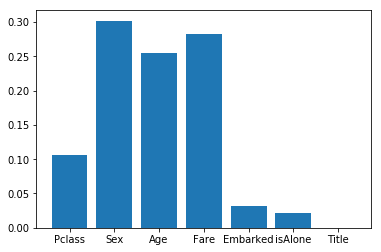

In [573]:

plt.bar(cols, importances)
#so looks like most important variables are sex, age and fare.

In [574]:
preds = RFC.predict(X_test)
submit = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": preds})
submit.to_csv("/Users/andreas/Documents/workspace/kaggle/titanic/submit.csv", index=False) #don't include indices


In [ ]:
submit

In [565]:
##Lets try AdaBoost instead. Remember this is sensitive to outliers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth = 1)
ADA = AdaBoostClassifier(DTC)
params = {"n_estimators": [50, 100, 300, 500],
          "learning_rate": [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]}


gs = GridSearchCV(ADA, cv = 10, param_grid = params, scoring = "accuracy")
gs.fit(X_train, Y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 300, 500], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [567]:
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 1.0, 'n_estimators': 100}
0.8237934904601572


In [569]:
DTC = DecisionTreeClassifier(max_depth = 1)
ADA = AdaBoostClassifier(DTC, n_estimators = 100, learning_rate = 1.0)
ADA.fit(X_train, Y_train)
preds = RFC.predict(X_test)
submit = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": preds})
submit.to_csv("/Users/andreas/Documents/workspace/kaggle/titanic/submit.csv", index=False) #don't include indices
